# 2020-10-21-2020-10-22-EnergyMinimization Analysis

In this file we analyse 2D shape deformation data made on 21st, 22nd of October 2020.

In [1]:
import meshio
import os
import matplotlib.pyplot as plt
import numpy as np
from AnalysisFunctions import *
import glob
import re
from collections import namedtuple

## Import the 2020-10-21 Dataset

In [2]:
datadict={}
DataKey=namedtuple('DataKey','kc, B')
ExptData=namedtuple('ExptData','Area EllipseData g0')
for kc in [0.1,0.5,1]:
    for B in [0,1,5,10]:
        
        datadir = os.getcwd()+"/Data/2020-10-21-EnergyMinimization/kc_"+"{0:0.1f}".format(kc)+"_B_"+"{0:0.1f}".format(B)+"/"

        # whats the range we want to plot
        g0start= 1.1
        g0end = 4
        g0step = 0.1
        g0steps = np.arange(g0start,g0end,g0step)
        N = len(g0steps)

        AreaList=np.zeros(shape=(N,1))
        g0List=np.zeros(shape=(N,1))
        EllipseDataList=np.zeros(shape=(N,5))

        for i,g0 in enumerate(g0steps):
            filename = datadir+"g0_"+"{0:0.1f}".format(g0)+".vtk"
            mesh = meshio.read(filename)

            AreaList[i]=TotalArea(mesh)
            g0List[i]= g0
            EllipseDataList[i]=BoundingEllipseOfBestFit(mesh)

        datadict[DataKey(kc=kc,B=B)]=ExptData(AreaList,EllipseDataList,g0List)


/home/jackbinysh/Code/ActiveElastocapillarity/Python/EnergyMinimization/AnalysisFunctions.py:63: RuntimeWarning: invalid value encountered in sqrt
  res1 = np.sqrt(up / down1)
/home/jackbinysh/Code/ActiveElastocapillarity/Python/EnergyMinimization/AnalysisFunctions.py:64: RuntimeWarning: invalid value encountered in sqrt
  res2 = np.sqrt(up / down2)


In [3]:
datadict.keys()

dict_keys([DataKey(kc=0.1, B=0), DataKey(kc=0.1, B=1), DataKey(kc=0.1, B=5), DataKey(kc=0.1, B=10), DataKey(kc=0.5, B=0), DataKey(kc=0.5, B=1), DataKey(kc=0.5, B=5), DataKey(kc=0.5, B=10), DataKey(kc=1, B=0), DataKey(kc=1, B=1), DataKey(kc=1, B=5), DataKey(kc=1, B=10)])

The data is a scan of (kc,B) space, where kc is the continuum bending modulus, and B is an area energy penalty, which is supposed to act as an addition to the Bulk modulus. for each (kc,B) pair above, I scan up through values of g_0, which is the ratio r_init/r_0 of the initial surface spring length to its preferred rest length, tracking the resulting shape.

## Checking the Area conservation is working:

The initial shape is a unit disc, surface area $\pi \approx 3.14..$

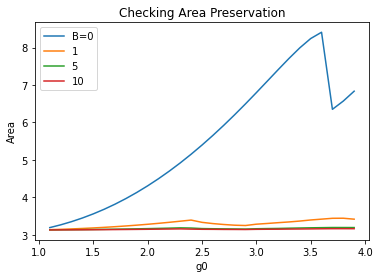

In [4]:
for B in [0,1,5,10]:
    key=DataKey(kc=0.1, B=B)
    g0=datadict[key].g0
    Area=datadict[key].Area
    plt.plot(g0,Area) 
    
plt.xlabel('g0')
plt.ylabel('Area')
plt.title('Checking Area Preservation')
plt.legend(['B=0',1,5,10])

## Tracking the shape deformation

Given an ellipse of major axis $\lambda$, minor $1/\lambda$, we can just track the major axis:

## kc=0.5

Text(0.5, 1.0, 'Ellipse axis, $k_c=0.5$')

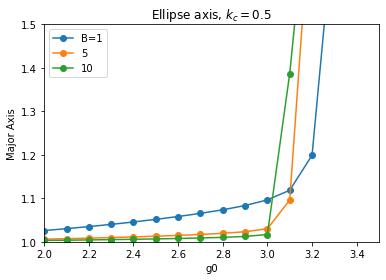

In [5]:
for B in [1,5,10]:
    key=DataKey(kc=0.5, B=B)
    g0=datadict[key].g0
    Aspect = datadict[key].EllipseData[:,0]
    plt.plot(g0,Aspect,marker='o') 
plt.xlabel('g0')
plt.xlim(2.0, 3.5)
plt.ylim(1.0, 1.5)
plt.ylabel('Major Axis')
plt.legend(['B=1',5,10])
plt.title('Ellipse axis, $k_c=0.5$')

## kc=0.1

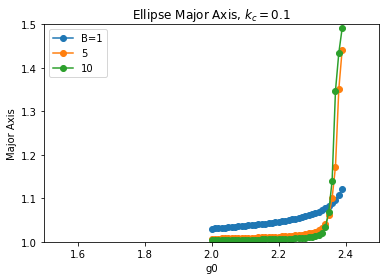

In [17]:
for B in [1,5,10]:
    key=DataKey(kc=0.1, B=B)
    g0=datadict[key].g0
    Aspect = datadict[key].EllipseData[:,0]
    plt.plot(g0,Aspect,marker='o') 
plt.xlabel('g0')
plt.xlim(1.5, 2.5)
plt.ylim(1.0, 1.5)
plt.ylabel('Major Axis')
plt.title('Ellipse Major Axis, $k_c=0.1$')
plt.legend(['B=1',5,10])

* There does appear to be a continuous transition, which sharpens as $B$ increases. But the steps in g_0 are quite coarse.
* Note that *where* the transition is, the value of g_0, of course depends on the bending modulus $k_c$! This isnt something we talk about in the paper.

In the next dataset, we zoom in on the transitions.

## Import the 2020-10-22 Dataset

In [7]:
datadict={}
DataKey=namedtuple('DataKey','kc, B')
ExptData=namedtuple('ExptData','Area EllipseData g0')
for kc in [0.1,0.5]:
    for B in [1,5,10]:
        
        datadir = os.getcwd()+"/Data/2020-10-22-EnergyMinimization/kc_"+"{0:0.1f}".format(kc)+"_B_"+"{0:0.1f}".format(B)+"/"

        # whats the range we want to plot
        if (kc==0.1):
            g0start= 2.0
            g0end = 2.4
        elif(kc==0.5):
            g0start= 2.8
            g0end = 3.2
                
        g0step = 0.01
        g0steps = np.arange(g0start,g0end,g0step)
        N = len(g0steps)

        AreaList=np.zeros(shape=(N,1))
        g0List=np.zeros(shape=(N,1))
        EllipseDataList=np.zeros(shape=(N,5))

        for i,g0 in enumerate(g0steps):
            filename = datadir+"g0_"+"{0:0.2f}".format(g0)+".vtk"
            mesh = meshio.read(filename)

            AreaList[i]=TotalArea(mesh)
            g0List[i]= g0
            EllipseDataList[i]=BoundingEllipseOfBestFit(mesh)

        datadict[DataKey(kc=kc,B=B)]=ExptData(AreaList,EllipseDataList,g0List)


In [8]:
datadict.keys()

dict_keys([DataKey(kc=0.1, B=1), DataKey(kc=0.1, B=5), DataKey(kc=0.1, B=10), DataKey(kc=0.5, B=1), DataKey(kc=0.5, B=5), DataKey(kc=0.5, B=10)])

## Tracking the shape deformation

## kc=0.5

Text(0.5, 1.0, 'Ellipse axis, $k_c=0.5$')

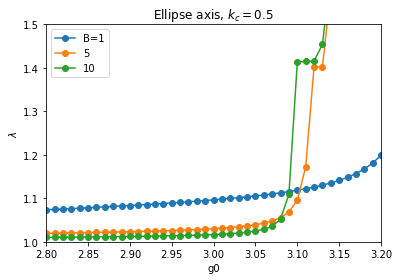

In [9]:
for B in [1,5,10]:
    key=DataKey(kc=0.5, B=B)
    g0=datadict[key].g0
    Aspect = datadict[key].EllipseData[:,0]
    plt.plot(g0,Aspect,marker='o') 
plt.xlabel('g0')
plt.xlim(2.8, 3.2)
plt.ylim(1, 1.5)
plt.ylabel('$\lambda$')
plt.legend(['B=1',5,10])
plt.title('Ellipse axis, $k_c=0.5$')

## kc=0.1

Text(0.5, 1.0, 'Ellipse axis, $k_c=0.1$')

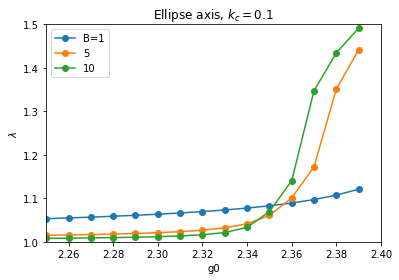

In [10]:
for B in [1,5,10]:
    key=DataKey(kc=0.1, B=B)
    g0=datadict[key].g0
    Aspect = datadict[key].EllipseData[:,0]
    plt.plot(g0,Aspect,marker='o') 
plt.xlabel('g0')
plt.xlim(2.25, 2.4)
plt.ylim(1, 1.5)
plt.ylabel('$\lambda$')
plt.legend(['B=1',5,10])
plt.title('Ellipse axis, $k_c=0.1$')

From the above data, its hard to conclude what the nature of the transition is. Below, for k_c = 0.1, I plot log($\lambda$), which is the variable in which the Landau expansion about the critical point is exactly even. Its --- plausible --- that there is a second order transtion here, at critical $g_0 \approx 2.34$

Text(0.5, 1.0, 'Log($\\lambda$), $k_c=0.1$')

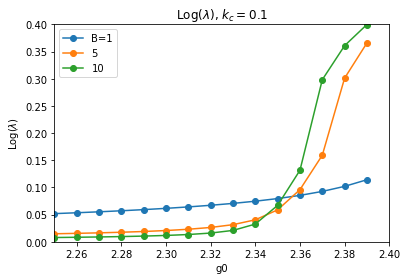

In [11]:
for B in [1,5,10]:
    key=DataKey(kc=0.1, B=B)
    g0=datadict[key].g0
    LogAspect = np.log(datadict[key].EllipseData[:,0])
    plt.plot(g0,LogAspect,marker='o') 
    
plt.xlabel('g0')
plt.xlim(2.25, 2.4)
plt.ylim(0, 0.4)
plt.ylabel('Log($\lambda$)')
plt.legend(['B=1',5,10])
plt.title('Log($\lambda$), $k_c=0.1$')

## Import the 2020-10-23 Dataset

In this dataset, we just focus on kc=0.1, and look closely at the effect of varying B about the transition point at $g_0 \approx 2.34$

In [62]:
datadict={}
DataKey=namedtuple('DataKey','kc, B')
ExptData=namedtuple('ExptData','Area EllipseData g0')
Blist = [1,5,10,15,20,30,40,50,100]
for kc in [0.1]:
    for B in Blist:
        
        datadir = os.getcwd()+"/Data/2020-10-23-EnergyMinimization/kc_"+"{0:0.1f}".format(kc)+"_B_"+"{0:0.1f}".format(B)+"/"

        # whats the range we want to plot
        g0start= 2.25
        g0end = 2.35
        
        g0step = 0.001
        g0steps = np.arange(g0start,g0end,g0step)
        N = len(g0steps)

        AreaList=np.zeros(shape=(N,1))
        g0List=np.zeros(shape=(N,1))
        EllipseDataList=np.zeros(shape=(N,5))

        for i,g0 in enumerate(g0steps):
            filename = datadir+"g0_"+"{0:0.3f}".format(g0)+".vtk"
            mesh = meshio.read(filename)

            AreaList[i]=TotalArea(mesh)
            g0List[i]= g0
            EllipseDataList[i]=BoundingEllipseOfBestFit(mesh)

        datadict[DataKey(kc=kc,B=B)]=ExptData(AreaList,EllipseDataList,g0List)

Text(0.5, 1.0, 'Ellipse axis, $k_c=0.1$')

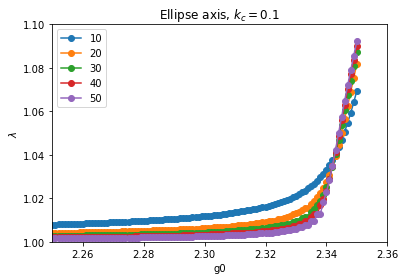

In [104]:

Blist = [10,20,30,40,50]
for B in Blist:
    key=DataKey(kc=0.1, B=B)
    g0=datadict[key].g0
    Aspect = datadict[key].EllipseData[:,0]
    plt.plot(g0,Aspect,marker='o') 
plt.xlabel('g0')
plt.xlim(2.25, 2.36)
plt.ylim(1, 1.1)
plt.ylabel('$\lambda$')
plt.legend(Blist)
plt.title('Ellipse axis, $k_c=0.1$')

Below, I plot the derivative of $\lambda $, to look for a divergence

Text(0.5, 1.0, '$ {d\\lambda}/{dg_0} $, $k_c=0.1$')

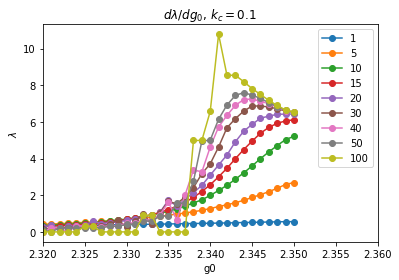

In [101]:
for B in Blist:
    key=DataKey(kc=0.1, B=B)
    g0=datadict[key].g0
    #LogAspect = np.gradient(np.log(datadict[key].EllipseData[:,0]))
    LogAspect = np.gradient((datadict[key].EllipseData[:,0]),g0step)
    plt.plot(g0,LogAspect,marker='o') 
    
plt.xlabel('g0')
plt.xlim(2.32, 2.36)
plt.ylabel('$\lambda$')
plt.legend(Blist)
plt.title('$ {d\lambda}/{dg_0} $, $k_c=0.1$')

We see the same thing examining $\log\lambda$:

Text(0.5, 1.0, '$ {dlog(\\lambda)}/{dg_0} $, $k_c=0.1$')

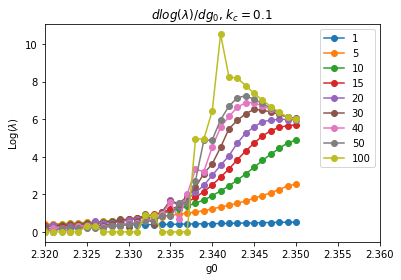

In [100]:
for B in Blist:
    key=DataKey(kc=0.1, B=B)
    g0=datadict[key].g0
    LogAspect = np.gradient(np.log(datadict[key].EllipseData[:,0]),g0step)
    plt.plot(g0,LogAspect,marker='o') 
    
plt.xlabel('g0')
plt.xlim(2.32, 2.36)
plt.ylabel('Log($\lambda$)')
plt.legend(Blist)
plt.title('$ {dlog(\lambda)}/{dg_0} $, $k_c=0.1$')

We appear to be asymptoting towards a divergence in the derivative at $g_0=2.34$. This is consistent with a second order transition.

# Testing the fit

Ignore this, this is just me checking the ellipse fitting is actually vaguely working

In [12]:
datadir = os.getcwd()+"/Data/2020-10-22-EnergyMinimization/kc_"+"{0:0.1f}".format(0.1)+"_B_"+"{0:0.1f}".format(5)+"/"
filename = datadir+"g0_"+"{0:0.2f}".format(2.37)+".vtk"
mesh = meshio.read(filename)
# get the edge bonds
triangles=mesh.cells[0].data
x = [[[triangle[0],triangle[1]],[triangle[0],triangle[2]],[triangle[1],triangle[2]] ]   for triangle in triangles]
flattenedx = [val for sublist in x for val in sublist]
bonds = [[x[0],x[1]] if x[0]<x[1] else [x[1],x[0]] for x in flattenedx]

edgebonds=[]
for elem in bonds:
    if 1==bonds.count(elem):
        edgebonds.append(elem)


bondvertices=[val for bond in edgebonds for val in bond]
uniqueids= list(set(bondvertices))
edgepoints= mesh.points[uniqueids]

x=edgepoints[:,0]
y=edgepoints[:,1]
a,b, center0, center1, phi = fit_ellipse(x,y)
center, axes = (center0, center1), (a, b)

In [13]:
# generate points on the fitted ellipse
R = np.arange(0, 2 * np.pi, 0.01)
a, b = axes
xx = center[0] + a * np.cos(R) * np.cos(phi) - b * np.sin(R) * np.sin(phi)
yy = center[1] + a * np.cos(R) * np.sin(phi) + b * np.sin(R) * np.cos(phi)

In [14]:
a

1.1726585326985095

In [15]:
b

0.8693011093955907

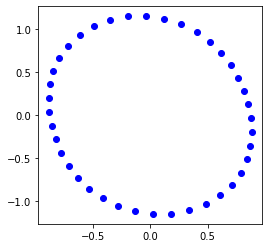

In [16]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, color='blue', label='points')
#plt.plot(xx, yy, '+', color='red', label='fitted ellipse', linewidth=2.0)